In [1]:
import pickle
import numpy as np
import tensorflow as tf
import PIL.Image

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.InteractiveSession()

In [51]:
with open('outputs/network-snapshot-003751Model2.pkl', 'rb') as file:
    G, D, Gs = pickle.load(file)

In [64]:
images = []
for i in range(10):
    latents = np.random.RandomState(i).randn(999, *[500]) 
    latents = latents[[477, 56, 83, 887, 583, 391, 86, 340, 341, 415]]

    c1 = np.zeros((10, 1))
    c2 = np.zeros((10, 10))
    c3 = np.zeros((10, 1))

    #c1[:, 1] = 1
    for i in range(10):
        c1[i] = 0.1*i
    # c1[:5, 0] = 1
    # c1[5:, 1] = 1

    for i in range(10):
        c2[i, i] = 1
    #c2[:, 5] = 1

    for i in range(10):
        c3[i] = 1 - 0.1 * i
    # c3[:5, 0] = 1
    # c3[5:, 1] = 1
    #c3[:, 1] = 1

    latents = np.hstack((latents, c1, c2, c3))
    #c1, c2, c3
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])
    images.append(Gs.run(latents, labels))

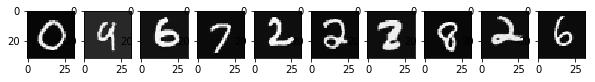

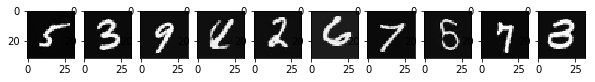

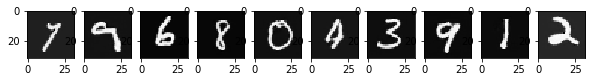

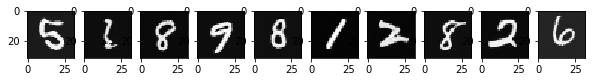

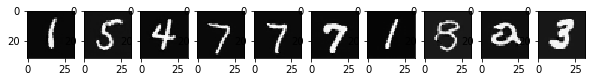

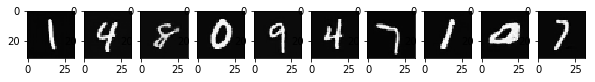

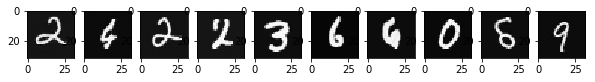

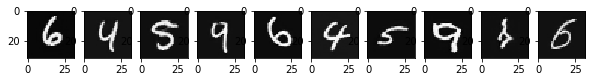

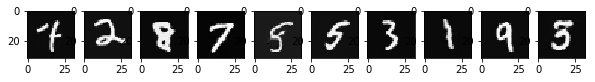

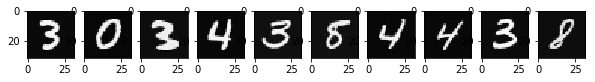

In [65]:
for i in range(10):
    _, axs = plt.subplots(1, 10, figsize=(10, 1))
    axs = axs.flatten()
    for img, ax in zip(images[i], axs):
        ax.imshow(img.reshape(32, 32), cmap = 'gray')
        #plt.show()